In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df = pd.read_csv("/Users/akshatgaur/Downloads/imdb_movies.csv")
df

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US
...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,12/28/2016,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US
10175,The Russia House,12/21/1990,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US
10176,Darkman II: The Return of Durant,07/11/1995,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


In [83]:
df.describe()

,score,budget_x,revenue
count,10178.000000,1.017800e+04,1.017800e+04
mean,63.497052,6.488238e+07,2.531401e+08
std,13.537012,5.707565e+07,2.777880e+08
min,0.000000,1.000000e+00,0.000000e+00
25%,59.000000,1.500000e+07,2.858898e+07
50%,65.000000,5.000000e+07,1.529349e+08
75%,71.000000,1.050000e+08,4.178021e+08
max,100.000000,4.600000e+08,2.923706e+09


In [84]:
df.isnull().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [129]:
df.dropna(subset=["genre","crew"],inplace = True)
df['score'].fillna(df['score'].median(), inplace=True)
df['release_year'] = df['date_x'].dt.year
df['release_decade'] = (df['release_year'] // 10) * 10

df

/var/folders/6r/c_1qywsn1ms58_glcln8tmzm0000gn/T/ipykernel_57122/3650389985.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['score'].fillna(df['score'].median(), inplace=True)


,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,release_year,release_decade
0,Creed III,2023-03-02,0.73,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,2023,2020
1,Avatar: The Way of Water,2022-12-15,0.78,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,2022,2020
2,The Super Mario Bros. Movie,2023-04-05,0.76,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,2023,2020
3,Mummies,2023-01-05,0.70,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,2023,2020
4,Supercell,2023-03-17,0.61,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,2023,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,2016-12-28,0.73,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US,2016,2010
10174,Delta Force 2: The Colombian Connection,1990-08-24,0.54,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US,1990,1990
10175,The Russia House,1990-12-21,0.61,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US,1990,1990
10176,Darkman II: The Return of Durant,1995-07-11,0.55,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US,1995,1990


In [130]:
df.isnull().sum()

names             0
date_x            0
score             0
genre             0
overview          0
crew              0
orig_title        0
status            0
orig_lang         0
budget_x          0
revenue           0
country           0
release_year      0
release_decade    0
dtype: int64

In [131]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10052 entries, 0 to 10177
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   names           10052 non-null  object        
 1   date_x          10052 non-null  datetime64[ns]
 2   score           10052 non-null  float64       
 3   genre           10052 non-null  object        
 4   overview        10052 non-null  object        
 5   crew            10052 non-null  object        
 6   orig_title      10052 non-null  object        
 7   status          10052 non-null  object        
 8   orig_lang       10052 non-null  object        
 9   budget_x        10052 non-null  float64       
 10  revenue         10052 non-null  float64       
 11  country         10052 non-null  object        
 12  release_year    10052 non-null  int32         
 13  release_decade  10052 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), object(8)
memor

In [132]:
df.head(20)

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,release_year,release_decade
0,Creed III,2023-03-02,0.73,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,2023,2020
1,Avatar: The Way of Water,2022-12-15,0.78,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,2022,2020
2,The Super Mario Bros. Movie,2023-04-05,0.76,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,2023,2020
3,Mummies,2023-01-05,0.70,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,2023,2020
4,Supercell,2023-03-17,0.61,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,2023,2020
5,Cocaine Bear,2023-02-23,0.66,"Thriller, Comedy, Crime","Inspired by a true story, an oddball group of ...","Keri Russell, Sari, Alden Ehrenreich, Eddie, O...",Cocaine Bear,Released,English,35000000.0,8.000000e+07,AU,2023,2020
6,John Wick: Chapter 4,2023-03-23,0.80,"Action, Thriller, Crime","With the price on his head ever increasing, Jo...","Keanu Reeves, John Wick, Donnie Yen, Caine, Bi...",John Wick: Chapter 4,Released,English,100000000.0,3.513494e+08,AU,2023,2020
7,Puss in Boots: The Last Wish,2022-12-26,0.83,"Animation, Family, Fantasy, Adventure, Comedy",Puss in Boots discovers that his passion for a...,"Antonio Banderas, Puss in Boots (voice), Salma...",Puss in Boots: The Last Wish,Released,English,90000000.0,4.834806e+08,AU,2022,2020
8,Attack on Titan,2022-09-30,0.59,"Action, Science Fiction","As viable water is depleted on Earth, a missio...","Paul Bianchi, Computer (voice), Erin Coker, Al...",Attack on Titan,Released,English,71000000.0,2.549465e+08,US,2022,2020
9,The Park,2023-03-02,0.58,"Action, Drama, Horror, Science Fiction, Thriller",A dystopian coming-of-age movie focused on thr...,"Chloe Guidry, Ines, Nhedrick Jabier, Bui, Carm...",The Park,Released,English,119200000.0,4.889625e+08,US,2023,2020


In [133]:
df['date_x'] = pd.to_datetime(df['date_x'])

In [134]:
df.isnull().sum()

names             0
date_x            0
score             0
genre             0
overview          0
crew              0
orig_title        0
status            0
orig_lang         0
budget_x          0
revenue           0
country           0
release_year      0
release_decade    0
dtype: int64

In [135]:
df["score"] = df["score"]/10
df

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,release_year,release_decade
0,Creed III,2023-03-02,0.073,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,2023,2020
1,Avatar: The Way of Water,2022-12-15,0.078,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,2022,2020
2,The Super Mario Bros. Movie,2023-04-05,0.076,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,2023,2020
3,Mummies,2023-01-05,0.070,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,2023,2020
4,Supercell,2023-03-17,0.061,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,2023,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,2016-12-28,0.073,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US,2016,2010
10174,Delta Force 2: The Colombian Connection,1990-08-24,0.054,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US,1990,1990
10175,The Russia House,1990-12-21,0.061,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US,1990,1990
10176,Darkman II: The Return of Durant,1995-07-11,0.055,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US,1995,1990


Text(0, 0.5, 'Genre')

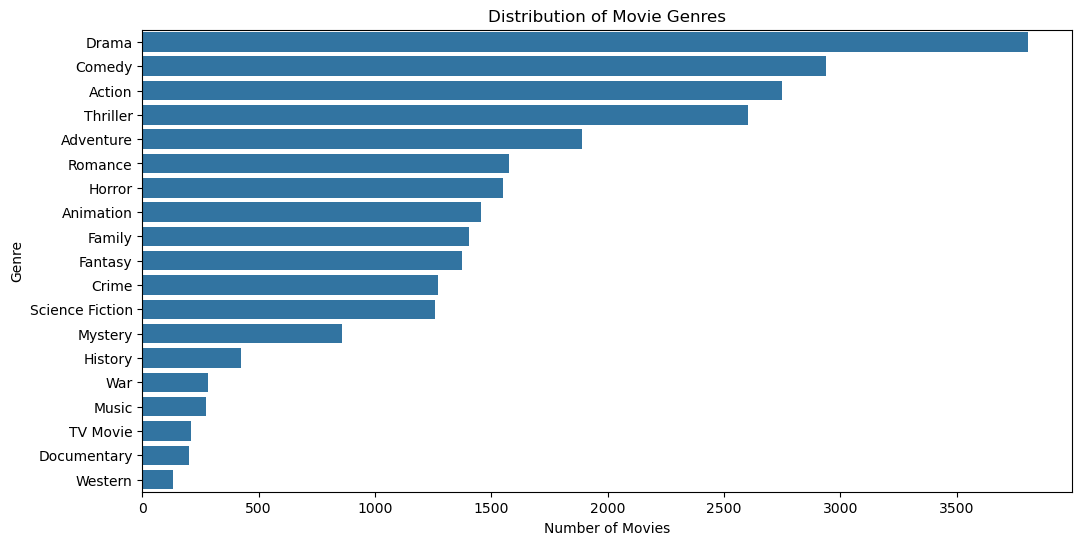

In [136]:
df_genre = df.copy()
df_genre['genre'] = df_genre['genre'].str.split(',\s*')
df_genre = df_genre.explode('genre')


plt.figure(figsize=(12, 6))
sns.countplot(y='genre', data=df_genre, order = df_genre['genre'].value_counts().index)

plt.title('Distribution of Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')


Text(0, 0.5, 'Genre')

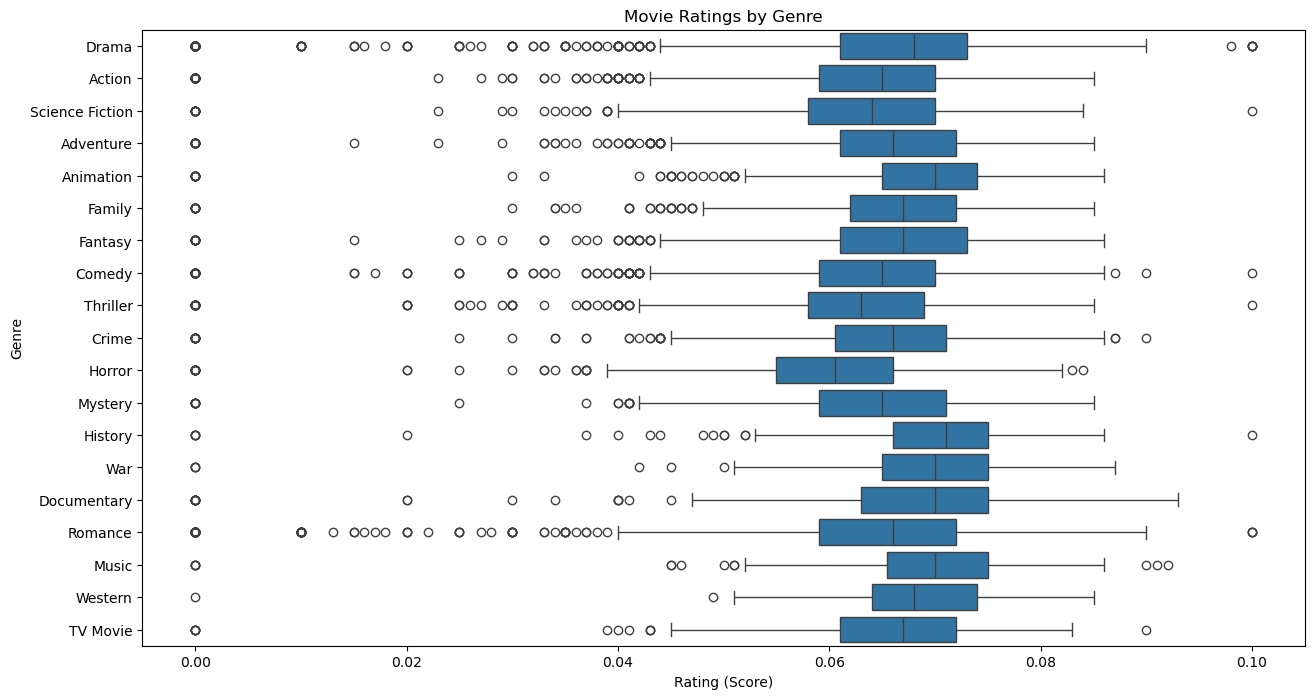

In [137]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='score', y='genre', data=df_genre)
plt.title('Movie Ratings by Genre')
plt.xlabel('Rating (Score)')
plt.ylabel('Genre')

Text(0, 0.5, 'Revenue')

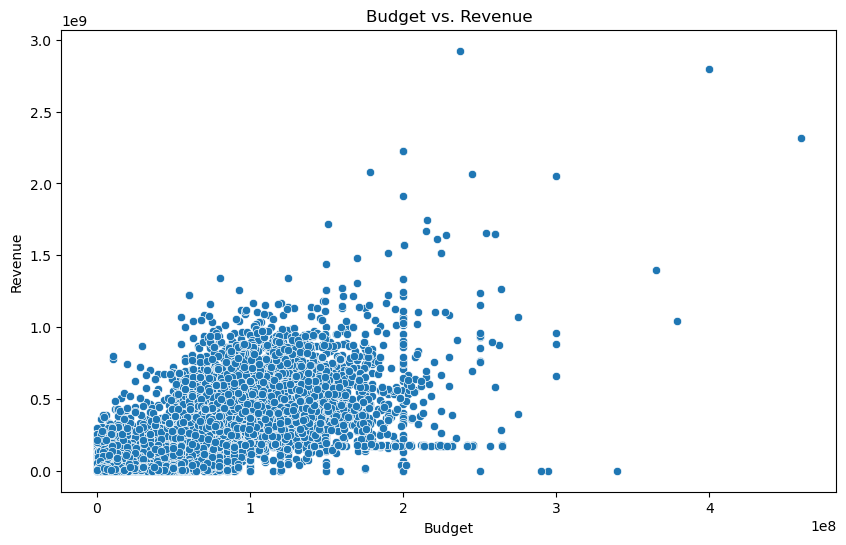

In [138]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget_x', y='revenue', data=df)
plt.title('Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'History'),
  Text(1, 0, 'War'),
  Text(2, 0, 'Animation'),
  Text(3, 0, 'Music'),
  Text(4, 0, 'Western'),
  Text(5, 0, 'Family'),
  Text(6, 0, 'Drama'),
  Text(7, 0, 'Fantasy'),
  Text(8, 0, 'Adventure'),
  Text(9, 0, 'Crime'),
  Text(10, 0, 'Documentary'),
  Text(11, 0, 'Mystery'),
  Text(12, 0, 'TV Movie'),
  Text(13, 0, 'Comedy'),
  Text(14, 0, 'Action'),
  Text(15, 0, 'Science Fiction'),
  Text(16, 0, 'Thriller'),
  Text(17, 0, 'Romance'),
  Text(18, 0, 'Horror')])

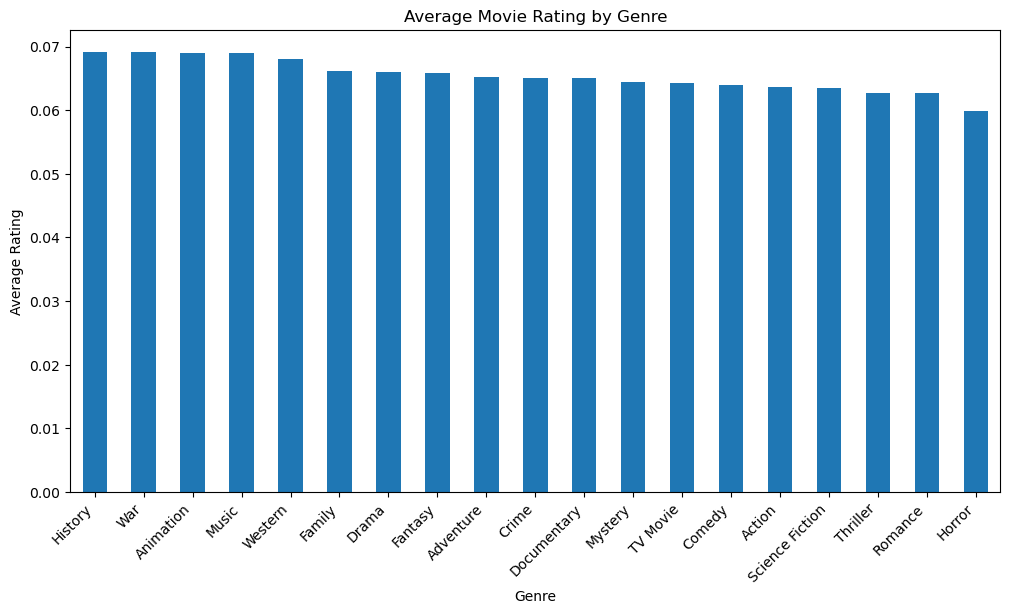

In [139]:
# Average rating by genre
avg_rating_genre = df_genre.groupby('genre')['score'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
avg_rating_genre.plot(kind='bar')
plt.title('Average Movie Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')

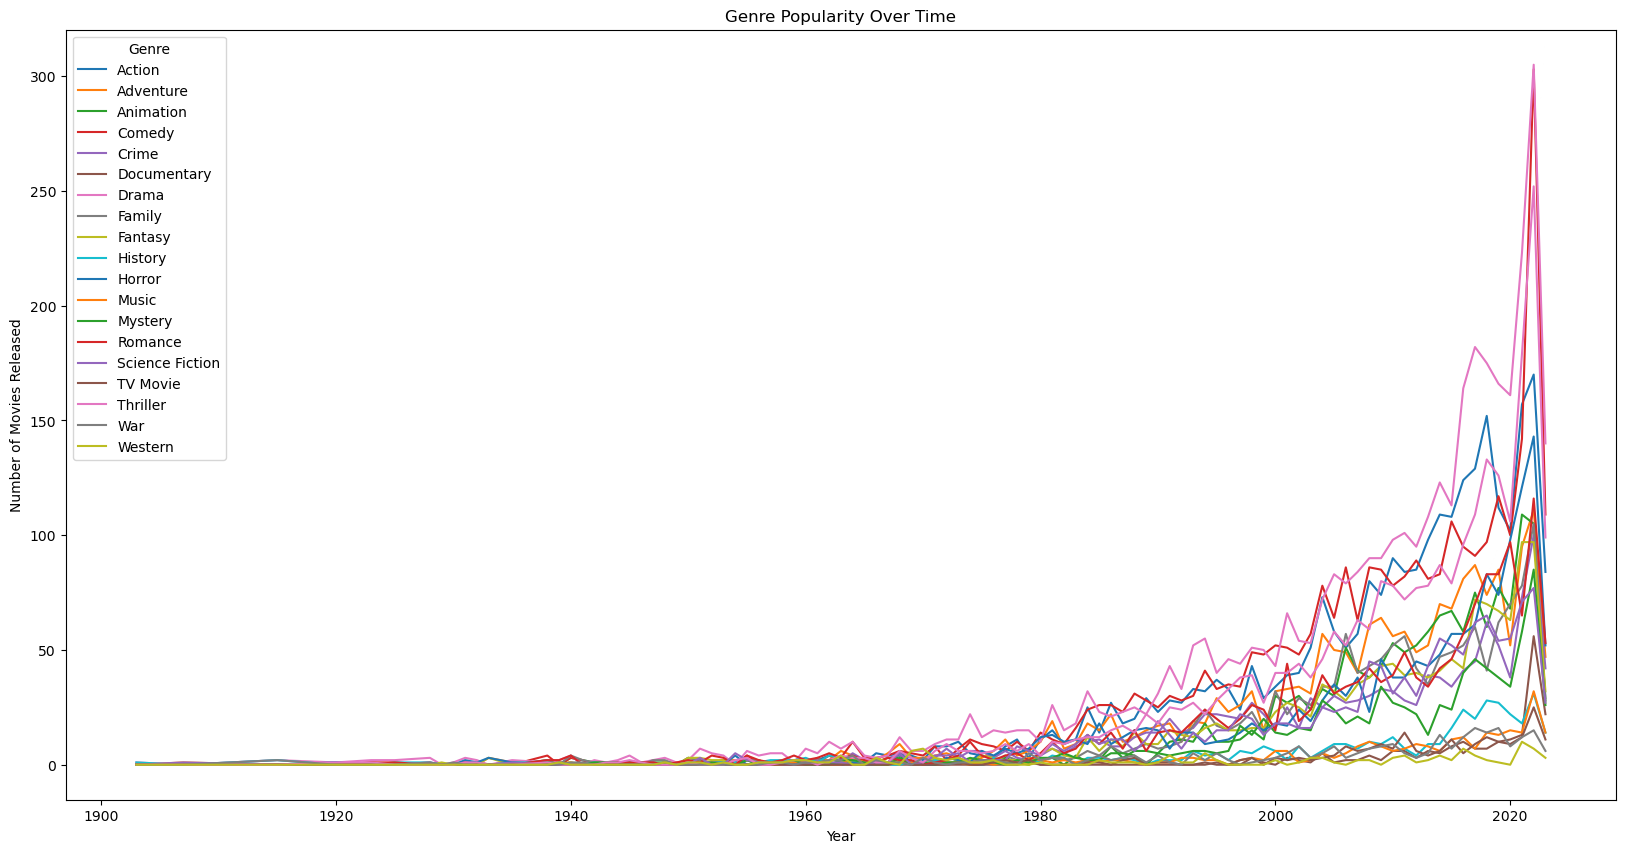

In [140]:

genre_yearly = df_genre.groupby(['release_year', 'genre']).size().unstack().fillna(0)
plt.figure(figsize=(20, 10))
genre_yearly.plot(kind='line', ax=plt.gca(), legend=False)
plt.title('Genre Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.legend(title='Genre', loc='upper left')


Text(0, 0.5, 'Average Rating')

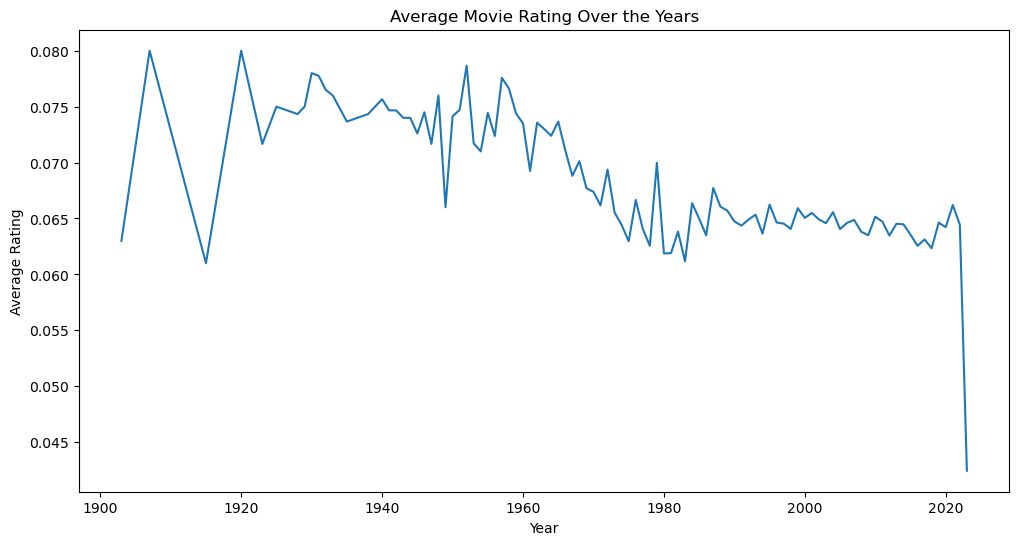

In [141]:
# Average movie rating over the years
avg_rating_year = df.groupby('release_year')['score'].mean()
plt.figure(figsize=(12, 6))
avg_rating_year.plot(kind='line')
plt.title('Average Movie Rating Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')


Year with the highest number of movie releases: 2022
Year with the lowest number of movie releases: 1903


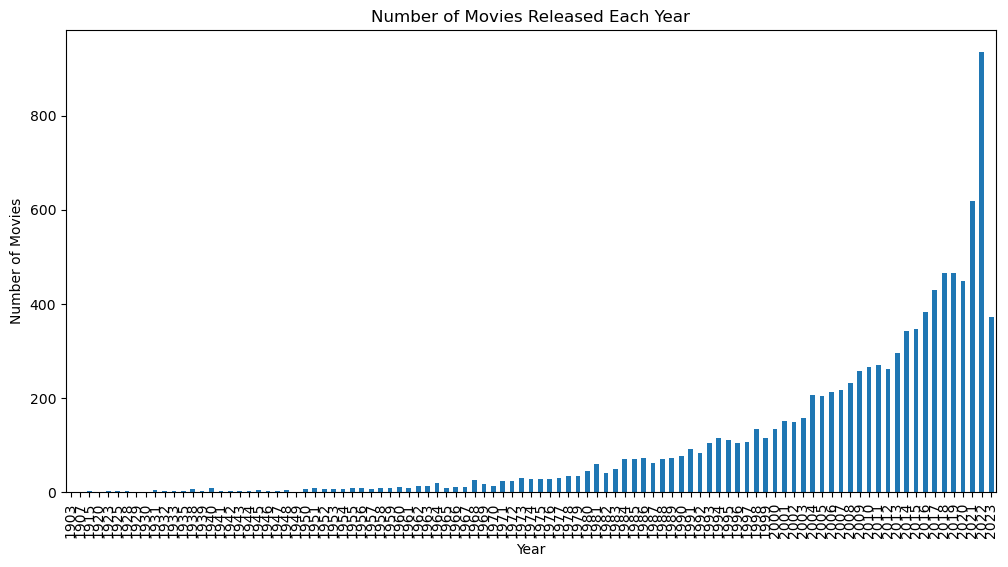

In [142]:
# Number of movies released each year
movies_per_year = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
movies_per_year.plot(kind='bar', width=0.5)
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
print("\nYear with the highest number of movie releases:", movies_per_year.idxmax())
print("Year with the lowest number of movie releases:", movies_per_year.idxmin())


(array([0, 1]), [Text(0, 0, 'Drama'), Text(1, 0, 'Adventure')])

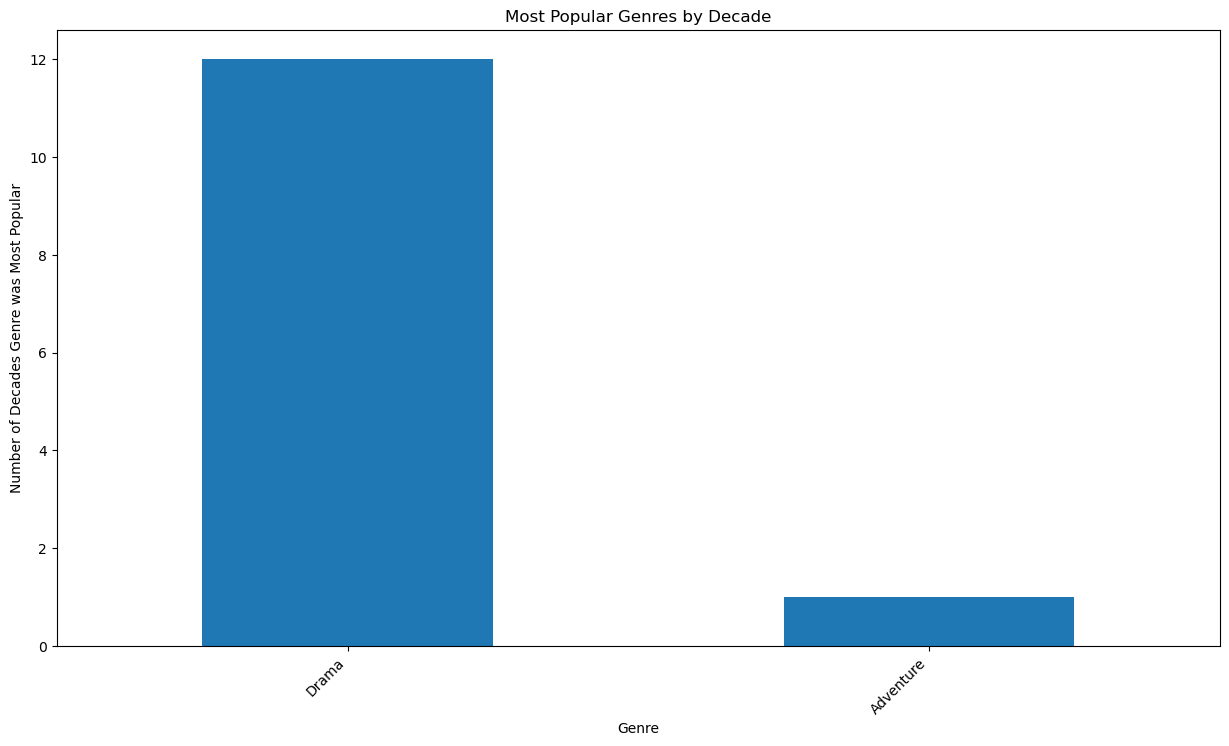

In [146]:
# Most popular genres by decade
popular_genres_decade = df_genre.groupby(['release_decade', 'genre']).size().unstack().fillna(0)
plt.figure(figsize=(15, 8))
popular_genres_decade.idxmax(axis=1).value_counts().plot(kind='bar')
plt.title('Most Popular Genres by Decade')
plt.xlabel('Genre')
plt.ylabel('Number of Decades Genre was Most Popular')
plt.xticks(rotation=45, ha='right')


Text(0.5, 1.0, 'Correlation Matrix of Budget, Revenue, and Score')

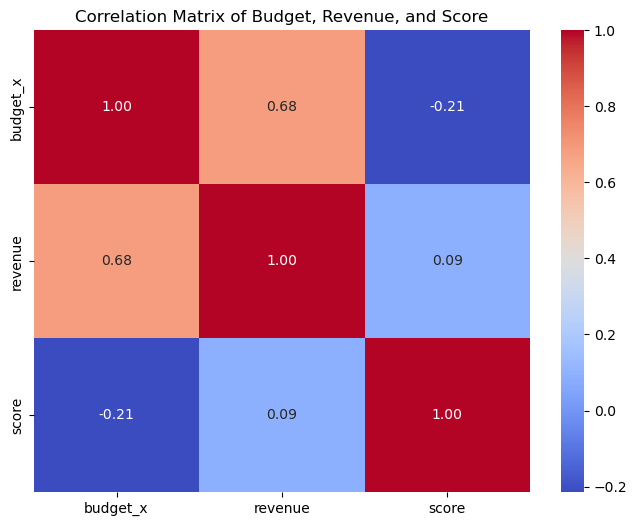

In [145]:
# Heatmap of correlations
correlation_matrix = df[['budget_x', 'revenue', 'score']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Budget, Revenue, and Score')


In [147]:
genre_year_rating = df_genre.groupby(['release_year', 'genre'])['score'].mean().nlargest(10)
print("Top 10 Genre-Year Combinations with Highest Average Ratings:")
print(genre_year_rating)

Top 10 Genre-Year Combinations with Highest Average Ratings:
release_year  genre  
1952          History    0.085
1956          Action     0.085
1931          Comedy     0.083
              Romance    0.083
1938          Drama      0.083
1941          War        0.083
1948          Fantasy    0.083
1958          War        0.083
1963          Crime      0.083
1950          Drama      0.083
Name: score, dtype: float64
